# Import dependencies

In [1]:

import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

 # Define dataset

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load dataset

In [3]:
X, Y = load_planar_dataset()

# Visualize the data

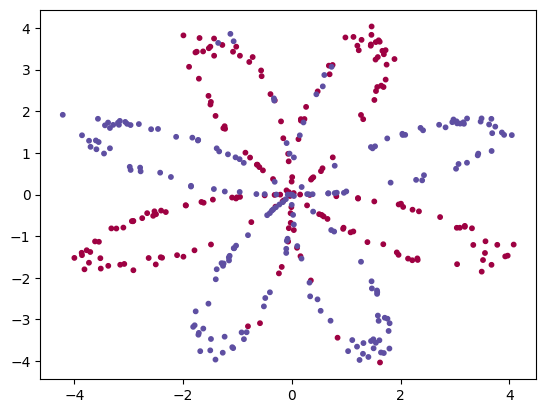

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, s=10, cmap=plt.cm.Spectral);

In [5]:
print ('The shape of X is: ', X.shape)
print ('The shape of Y is: ', Y.shape)
print ('I have m = %d training examples!', (X.shape[1]))

The shape of X is:  (2, 400)
The shape of Y is:  (1, 400)
I have m = %d training examples! 400


# Define the hidden layer size

In [6]:
hidden_layer_nodes = 4

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = hidden_layer_nodes
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

# Define activation function

In [7]:
def sigmoid(x):
    
    s = 1/(1+np.exp(-x))
    return s

# Define function for parameter (weight and bias) initialization

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)

    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# Forward propagation

In [9]:

def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# Compute cost

In [10]:
def compute_cost(A2, Y):

    m = Y.shape[1] # number of examples

    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.multiply(1/m, np.sum(logprobs))  
    cost = float(np.squeeze(cost))                             
    
    return cost

# Backward propagation

In [11]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.multiply(1/m, np.dot(dZ2, np.transpose(A1)))
    db2 = np.multiply(1/m, np.sum(dZ2, axis = 1, keepdims = True))
    dZ1 = np.multiply(np.dot(np.transpose(W2), dZ2), (1 - np.power(A1, 2)))
    dW1 = np.multiply(1/m, np.dot(dZ1, np.transpose(X)))
    db1 = np.multiply(1/m, np.sum(dZ1, axis = 1, keepdims = True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

# Update parameters

In [12]:

def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1 = copy.deepcopy(parameters["W1"]) 
    b1 = copy.deepcopy(parameters["b1"]) 
    W2 = copy.deepcopy(parameters["W2"]) 
    b2 = copy.deepcopy(parameters["b2"]) 
    
    dW1 = copy.deepcopy(grads["dW1"]) 
    db1 = copy.deepcopy(grads["db1"])
    dW2 = copy.deepcopy(grads["dW2"])
    db2 = copy.deepcopy(grads["db2"])
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# Full NN model

In [13]:

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
   
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

# Test on our dataset

In [14]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 100000, print_cost=True)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219447
Cost after iteration 9000: 0.218605
Cost after iteration 10000: 0.217904
Cost after iteration 11000: 0.217301
Cost after iteration 12000: 0.216780
Cost after iteration 13000: 0.216325
Cost after iteration 14000: 0.215921
Cost after iteration 15000: 0.215559
Cost after iteration 16000: 0.215231
Cost after iteration 17000: 0.214932
Cost after iteration 18000: 0.214658
Cost after iteration 19000: 0.214404
Cost after iteration 20000: 0.214169
Cost after iteration 21000: 0.213949
Cost after iteration 22000: 0.213744
Cost after iteration 23000: 0.213551
Cost after iteration 24000: 0.213369
Cost after iteration 25000: 0.213198
Cost after iteration 26000: 0.213035
Cost after ite

# Predict function

In [15]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

# Plot decision boundary

In [16]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

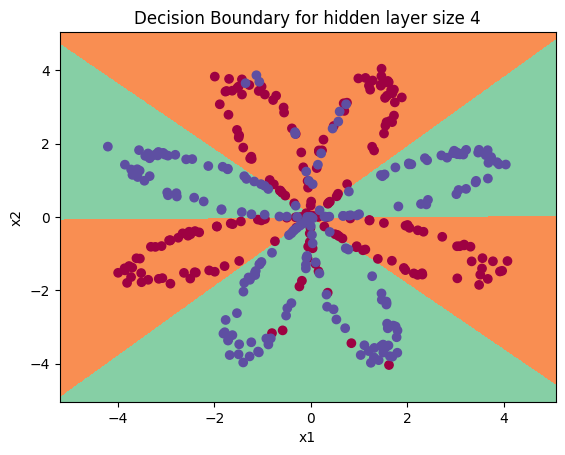

In [17]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Tuning hidden layer size

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 15 hidden units: 91.0 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %
Accuracy for 100 hidden units: 90.75 %


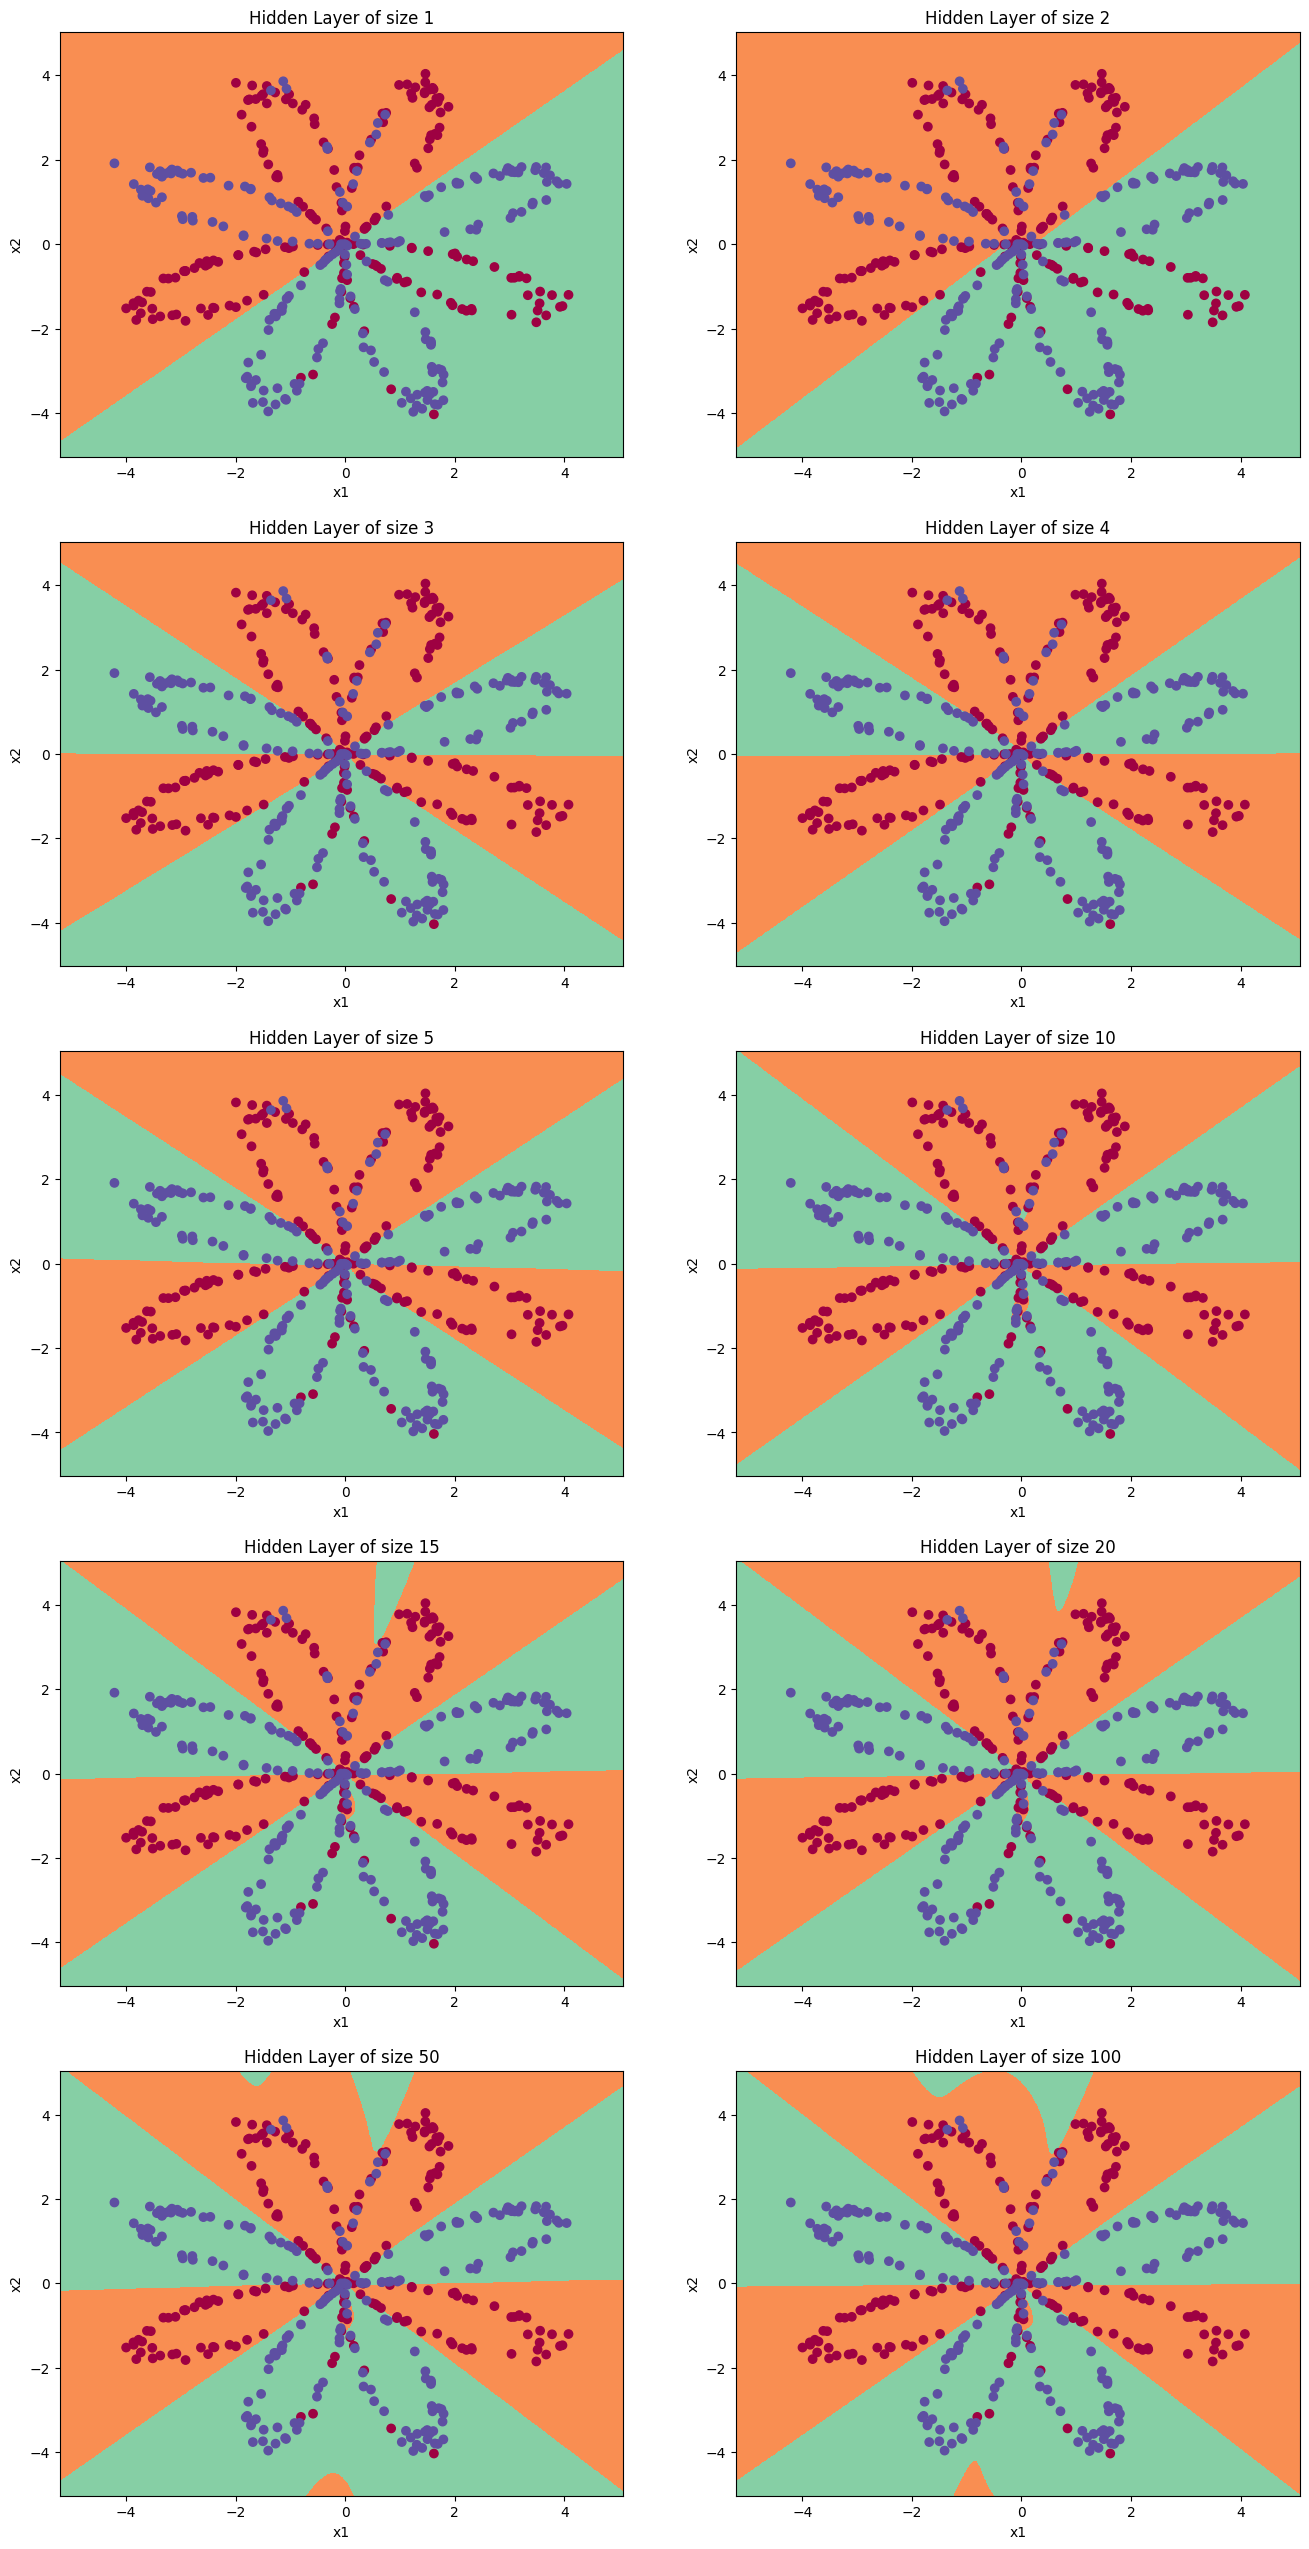

In [23]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 15, 20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = ((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / Y.size * 100).item()

    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## Assignment: 

Run the notebook and test if everything runs fine. 

Test previous cell with different hidden layer size. 

Write your conclusion and observations.

I added 10, 15 and 100 hidden layer sizes, the best accuracy is 91.25 % achieved with 5 hidden layers.
The model underfits with 1 and 2 layers.
Accuracy stabilizes around 90–91%.
No meaningful improvement beyond 5 layers.
Increasing layer amount does not improve performance.